In [15]:
import pandas as pd
import os
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [17]:
data = pd.read_csv("/Users/karanmehta/Desktop/University of Chicago/Capstone Project - Barchart/Data/SEC_Filings.csv")

In [19]:
data.head(10)

,symbol,name,date,form,description,pdfURL,htmlURL,wordURL,excelURL
0,MMM,3M Company,2024-02-07,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
1,MMM,3M Company,2023-02-08,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
2,MMM,3M Company,2022-02-09,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
3,MMM,3M Company,2021-02-04,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
4,MMM,3M Company,2020-02-06,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
5,MMM,3M Company,2019-02-07,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
6,MMM,3M Company,2018-02-08,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
7,MMM,3M Company,2017-02-09,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
8,MMM,3M Company,2016-02-11,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...
9,MMM,3M Company,2015-02-12,10-K,Annual Report,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...,https://barchart.websol.barchart.com/?module=s...


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symbol       5523 non-null   object
 1   name         5523 non-null   object
 2   date         5523 non-null   object
 3   form         5523 non-null   object
 4   description  5523 non-null   object
 5   pdfURL       5523 non-null   object
 6   htmlURL      5523 non-null   object
 7   wordURL      5496 non-null   object
 8   excelURL     5024 non-null   object
dtypes: object(9)
memory usage: 388.5+ KB


In [23]:
#Downloading all Data Locally
def download_file(url, path):
    """Download a file from a URL and save it locally."""
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {str(e)}")

def download_reports(data):
    base_dir = 'SEC_Filings'  # Base directory for saving files
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    for index, row in data.iterrows():
        if pd.notna(row['pdfURL']) and pd.notna(row['excelURL']):
            symbol_dir = os.path.join(base_dir, row['symbol'])  # Folder for each symbol
            if not os.path.exists(symbol_dir):
                os.makedirs(symbol_dir)

            # Naming and saving the PDF file
            pdf_file_name = f"{row['symbol']}{row['date'].replace('-', '')}Report.pdf"
            pdf_file_path = os.path.join(symbol_dir, pdf_file_name)
            download_file(row['pdfURL'], pdf_file_path)

            # Naming and saving the Excel file
            # excel_file_name = f"{row['symbol']}{row['date'].replace('-', '')}Report.xlsx"
            # excel_file_path = os.path.join(symbol_dir, excel_file_name)
            # download_file(row['excelURL'], excel_file_path)
        else:
            print(f"Skipping row {index} due to missing URL.")


start_time = time.time()

# Load data
download_reports(data)

# Stop the timer and calculate the duration
end_time = time.time()
duration = end_time - start_time
print(f"Download completed in {duration:.2f} seconds.")

Skipping row 11 due to missing URL.
Skipping row 12 due to missing URL.
Skipping row 24 due to missing URL.
Skipping row 36 due to missing URL.
Skipping row 48 due to missing URL.
Skipping row 60 due to missing URL.
Skipping row 72 due to missing URL.
Skipping row 83 due to missing URL.
Skipping row 95 due to missing URL.
Skipping row 106 due to missing URL.
Skipping row 118 due to missing URL.
Skipping row 130 due to missing URL.
Skipping row 144 due to missing URL.
Skipping row 156 due to missing URL.
Skipping row 168 due to missing URL.
Skipping row 179 due to missing URL.
Skipping row 190 due to missing URL.
Skipping row 202 due to missing URL.
Skipping row 214 due to missing URL.
Skipping row 234 due to missing URL.
Skipping row 246 due to missing URL.
Skipping row 263 due to missing URL.
Skipping row 275 due to missing URL.
Skipping row 287 due to missing URL.
Skipping row 288 due to missing URL.
Skipping row 300 due to missing URL.
Skipping row 312 due to missing URL.
Skipping r

In [25]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
data['year'] = data['date'].dt.year

/var/folders/th/yqw69cc153l1vv57rzqzcqmm0000gn/T/ipykernel_19202/2972651286.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       5523 non-null   object        
 1   name         5523 non-null   object        
 2   date         5523 non-null   datetime64[ns]
 3   form         5523 non-null   object        
 4   description  5523 non-null   object        
 5   pdfURL       5523 non-null   object        
 6   htmlURL      5523 non-null   object        
 7   wordURL      5496 non-null   object        
 8   excelURL     5024 non-null   object        
 9   year         5523 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 410.0+ KB


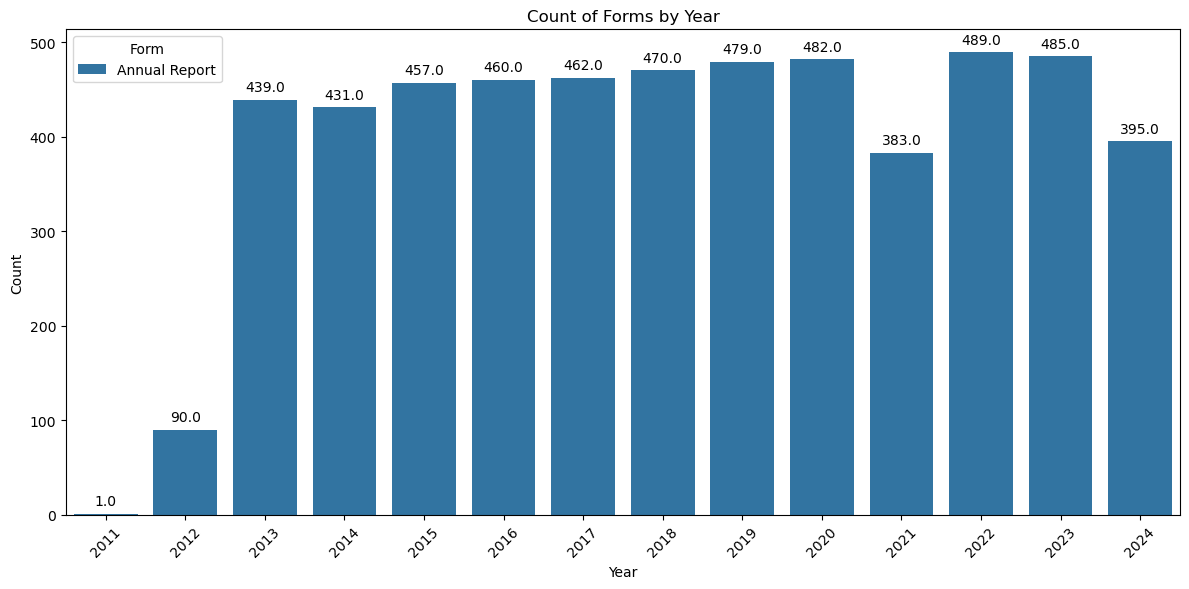

In [29]:
form_counts_by_year = data.groupby(['year', 'description']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=form_counts_by_year, x='year', y='count', hue='description')
plt.title('Count of Forms by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Form')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.tight_layout()  # Adjust subplots to give some padding

# Adding text labels for each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

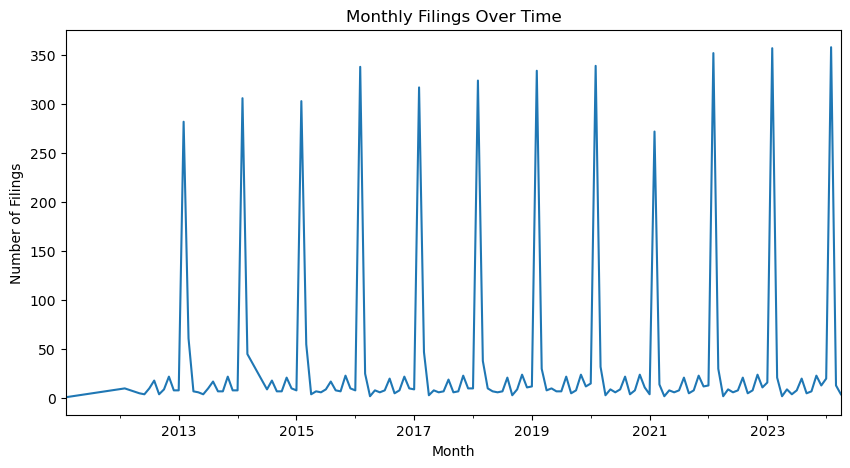

In [31]:
data['count'] = 1
filings_over_time = data.groupby([data['date'].dt.to_period("M")]).count()['count']
filings_over_time.plot(kind='line', figsize=(10, 5))
plt.title('Monthly Filings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Filings')
plt.show()

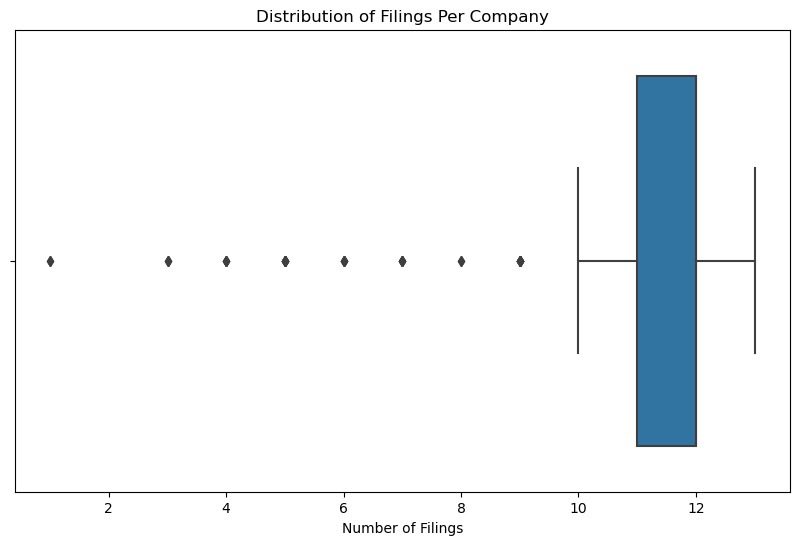

In [33]:
filings_per_symbol = data.groupby('symbol').size()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filings_per_symbol)
plt.title('Distribution of Filings Per Company')
plt.xlabel('Number of Filings')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


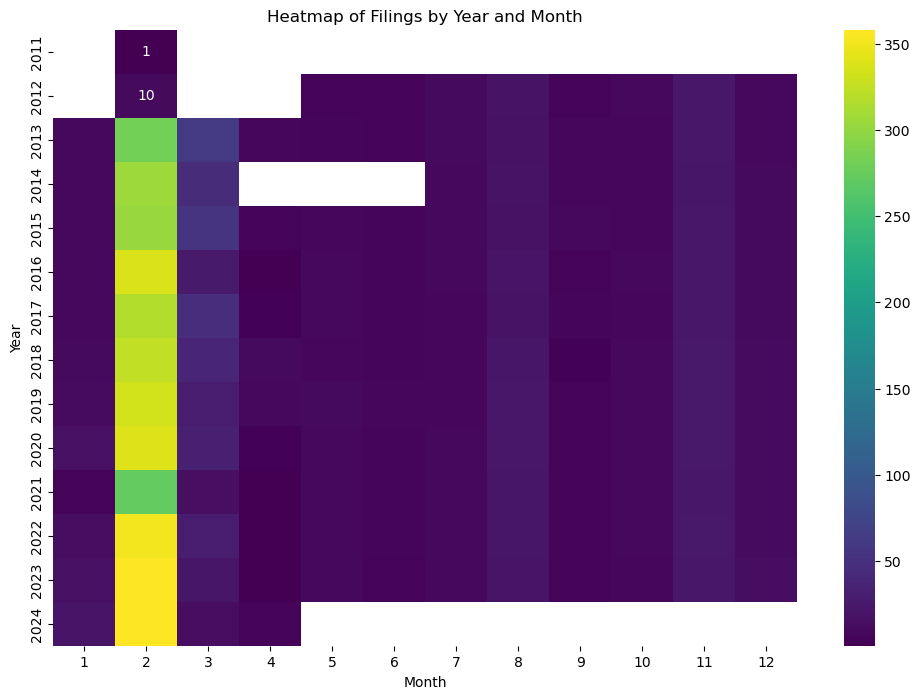

In [35]:
data['year_month'] = data['date'].dt.to_period('M')

# Create a pivot table
pivot_table = data.pivot_table(index=data['year_month'].dt.year, columns=data['year_month'].dt.month, values='name', aggfunc='count')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Filings by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()